In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
import numpy as np
import pandas as pd
import os

In [2]:
housing_combined_data_df = pd.read_csv(r"https://raw.githubusercontent.com/chaenii989/Final_Project_What_is_Affecting_US_Housing_Market/main/etl/housing_combined_data.csv")
housing_combined_data_df.columns

Index(['date', 'interest_rate', 'units_authorized_started', 'avg_home_price',
       'homeownership_rate', 'lumber_price_index', 'house_supply',
       'new_housing_permits', 'steel_price_index', 'under_construction',
       'units_completed'],
      dtype='object')

In [3]:
# Multivariate Linear Regression for Time-Series Data with Machine Learning

def MultivariateLinearRegression(df, target_column):

    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression

    # Clean DataFrame
    df = df.dropna()
    df = df.drop_duplicates()

    # Transform DataFrame
    df["y_actual_output"] = target_column
    df = df.set_index("date")

    data = {}

    last_col = len(df.iloc[0,:])
    last_row = len(df.iloc[:,0])
    
    print(f"Number of Columns: {last_col}")
    print(f"Number of Rows: {last_row}")

    for i in range(0, (last_col - 1)):
        list = df.iloc[:, i].astype("float").to_list()
        x_list = [0]
        for x in list:
            x_list.append(x)
        data[f'X{i+1}'] = f'X{i+1}'
        data[f'X{i+1}'] = x_list

    y_list = df.iloc[:, last_col - 1].astype("float").to_list()
    y_list.append(0)
    data['Y'] = y_list

    ml_df = pd.DataFrame(data)

    last_row = len(ml_df.iloc[:,1])
    last = len(ml_df.iloc[0,:])
    ml_df = ml_df.drop(0, inplace=False).drop(last_row - 1, inplace=False)

    # Assign data to X and y
    X = ml_df.iloc[:,0:last-1]
    y = ml_df["Y"].values.reshape(-1, 1)

    print("Shape: ", X.shape, y.shape)

    # Train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    # Linear regression model
    model = LinearRegression()

    # Fit model with all features in X for R2 score
    model.fit(X, y)
    score = model.score(X, y)

    print(f"R2 Score: {score}")

    # Fit model for training and testing scores
    model.fit(X_train, y_train)
    training_score = model.score(X_train, y_train)
    testing_score = model.score(X_test, y_test)

    print(f"Training Score: {training_score}")
    print(f"Testing Score: {testing_score}")

    # Coefficient and the intercept
    weight_coefficients = model.coef_
    y_axis_intercept = model.intercept_

    print(f"Weight coefficients: {weight_coefficients}")
    print(f"Y-Axis Intercept: {y_axis_intercept}")

    # X value min & max
    x_min = np.array([[X.min()]])
    x_max = np.array([[X.max()]])

    print(f"Min X Value: {x_min}")
    print(f"Max X Value: {x_max}")

    # Predictions
    predictions = model.predict(X)
    prediction_error = predictions - y
    predicted_output = predictions
    actual_output = y
    most_recent_value = len(actual_output) - 1
    max_error = max(prediction_error)
    min_error = min(prediction_error)

    print(f"Actual Output: {y[most_recent_value]}")
    print(f"Predicted Output: {predictions[most_recent_value]}")
    print(f"Prediction Error: {predictions[most_recent_value]-y[most_recent_value]}")
    print(f"Max Prediction Error: {max_error}")
    print(f"Min Prediction Error: {min_error}")

    # Plot residuals for training and testing data
    plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c="blue", label="Training Data")
    plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c="red", label="Testing Data")
    plt.legend()
    plt.hlines(y=0, xmin=y.min(), xmax=y.max() )
    plt.title("Training and Testing Residuals Plot")
    plt.tight_layout()
    plt.savefig("machine_learning_output/residuals_plot_ml_multivariate_linear_regression.png")

    plt.show()

    # Build predicted values dataframe
    df = df.reset_index()
    predicted_df = df.drop(axis = 0, index = 0, inplace = False)
    predicted_df = predicted_df.reset_index()
    predicted_df["predicted"] = predicted_output
    predicted_df["error"] = prediction_error

    # Write Output to CSV
    predicted_df.to_csv('machine_learning_output/output_ml_multivariate_linear_regression.csv')

    # Write Results to Txt
    file_to_output = os.path.join("machine_learning_output", "results_ml_multivariate_linear_regression.txt")
    with open(file_to_output, "w") as txt_file:
        results_ml_multivariate_linear_regression = (
            f"----------------------------------------------------------------------------------------\n"
            f"Multivariate Linear Regresssion on Time-Series Data with Machine Learning\n"
            f"----------------------------------------------------------------------------------------\n"
            f"Original Dataset Length:\n"
            f"Number of Columns: {last_col}\n"
            f"Number of Rows: {last_row}\n"
            f"Shape: {X.shape}, {y.shape}\n"
            f"----------------------------------------------\n"
            f"Machine Learning Results\n"
            f"----------------------------------------------\n"
            f"Scores:\n"
            f"R2 Score: {score}\n"
            f"Training Score: {training_score}\n"
            f"Testing Score: {testing_score}\n"
            f"----------------------------------------------\n"
            f"Values:\n"
            f"Weight Coefficients: {weight_coefficients}\n"
            f"Y-Axis Intercept: {y_axis_intercept}\n"
            f"Min X Value: {x_min}\n"
            f"Max X Value: {x_max}\n"
            f"----------------------------------------------\n"
            f"Predictions:\n"
            f"Actual Output: {y[most_recent_value]}\n"
            f"Predicted Output: {predictions[most_recent_value]}\n"
            f"Prediction Error: {predictions[most_recent_value]-y[most_recent_value]}\n"
            f"Max Prediction Error: {max_error}\n"
            f"Min Prediction Error: {min_error}\n"
            f"----------------------------------------------------------------------------------------\n")
        txt_file.write(results_ml_multivariate_linear_regression)

    return predicted_df

In [5]:
# Line Graph

def LineFunction(predicted_df):

    # Assign x and y axis
    x_axis = predicted_df["date"].astype("string").to_list()
    y_axis_a = predicted_df["y_actual_output"].to_list()
    y_axis_p = predicted_df["predicted"].to_list()

    # Graph figure size
    plt.figure(figsize=(20,8))

    # Set x limits
    plt.xlim('1990-01-01', '2021-04-01')

    # Plot lines
    plt.plot(x_axis, y_axis_a) # First line
    plt.plot(x_axis, y_axis_p) # Second line

    # Asthetics
    line_one,=plt.plot(x_axis, y_axis_a, color='blue', linewidth=1, label="Actual Value")
    line_two,=plt.plot(x_axis, y_axis_p, color='red', linewidth=1, label="Predicted Value")
    plt.legend(handles=[line_one, line_two],loc="best",fontsize="large", fancybox=True)
    plt.xticks(x_axis, rotation=90)
    plt.title("Actual vs. Predicted Values")
    plt.xlabel('Date by Quarter')
    plt.ylabel('Output Value')
    plt.tight_layout()
    plt.savefig("machine_learning_output/line_plot_ml_multivariate_linear_regression.png")

    plt.show()

    return predicted_df

Number of Columns: 11
Number of Rows: 125
Shape:  (124, 10) (124, 1)
R2 Score: 0.9915267525981379
Training Score: 0.9922490753155899
Testing Score: 0.9830009095706425
Weight coefficients: [[-4.45009651e+03  5.08872972e+00  8.79046007e-01 -1.76062831e+03
  -2.07161593e+02 -1.16569138e+03 -4.43569044e+00  7.62715275e+01
   3.15679748e+00  1.14186153e+01]]
Y-Axis Intercept: [162220.11225813]
Min X Value: [[[2.7600e+00 5.2600e+02 1.1700e+05 6.3100e+01 5.1380e+01 4.0000e+00
   5.3900e+02 1.0783e+02 4.1600e+02 5.5900e+02]]]
Max X Value: [[[1.0320e+01 2.1200e+03 3.5870e+05 6.9400e+01 1.4759e+02 1.1000e+01
   2.2280e+03 2.8717e+02 1.4230e+03 2.1100e+03]]]
Actual Output: [347500.]
Predicted Output: [350503.97356237]
Prediction Error: [3003.97356237]
Max Prediction Error: [13057.19520935]
Min Prediction Error: [-31281.07004205]


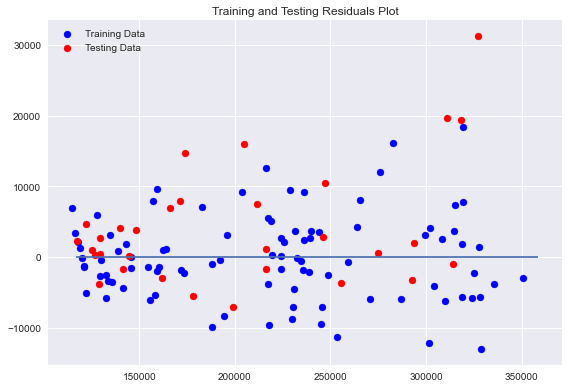

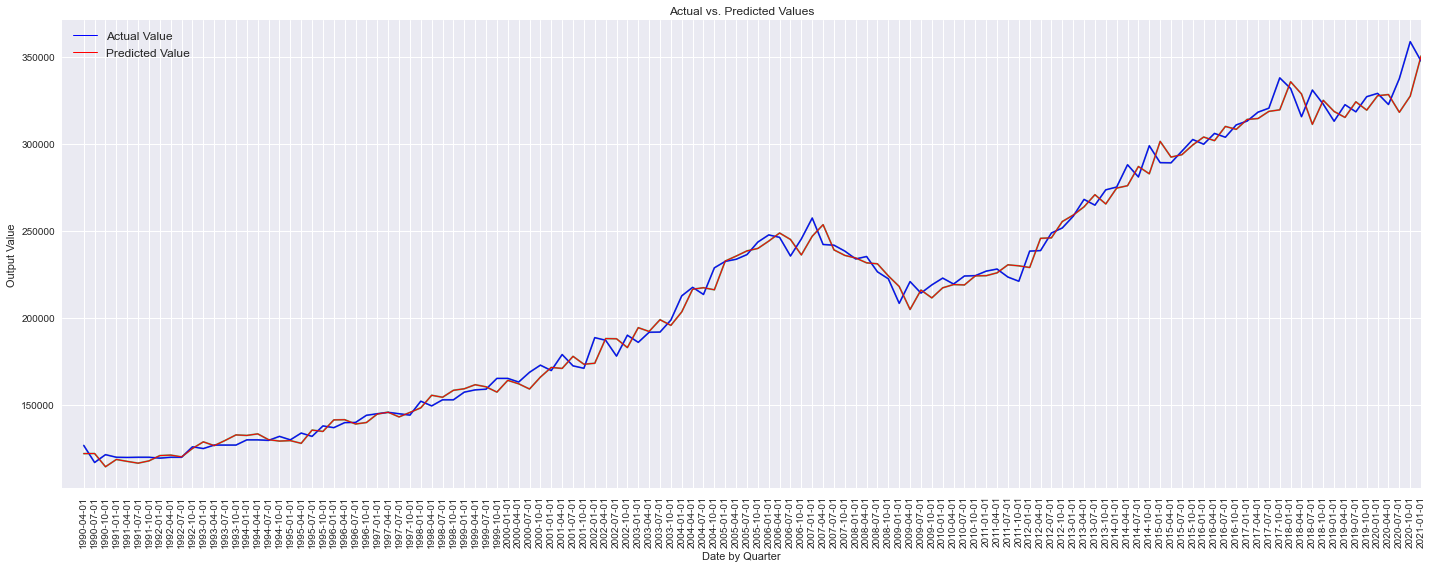

In [6]:
LineFunction(MultivariateLinearRegression(housing_combined_data_df, housing_combined_data_df["avg_home_price"]))